In [ ]:
#importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score, f1_score, recall_score, precision_score
from sklearn import metrics

In [ ]:
#uploading dataset
uploaded=files.upload()

Saving IBM.csv to IBM.csv


In [ ]:
#Creating pandas dataframe using the csv file 
df = pd.read_csv('IBM.csv')

In [ ]:
#First 5 rows in the dataframe 
df.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2


In [ ]:
#information about each column 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Attrition                1470 non-null   object
 2   Department               1470 non-null   object
 3   DistanceFromHome         1470 non-null   int64 
 4   Education                1470 non-null   int64 
 5   EducationField           1470 non-null   object
 6   EnvironmentSatisfaction  1470 non-null   int64 
 7   JobSatisfaction          1470 non-null   int64 
 8   MaritalStatus            1470 non-null   object
 9   MonthlyIncome            1470 non-null   int64 
 10  NumCompaniesWorked       1470 non-null   int64 
 11  WorkLifeBalance          1470 non-null   int64 
 12  YearsAtCompany           1470 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 149.4+ KB


In [ ]:
#Numbers of nulls / nans in each column
df.isnull().sum()

Age                        0
Attrition                  0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EnvironmentSatisfaction    0
JobSatisfaction            0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
WorkLifeBalance            0
YearsAtCompany             0
dtype: int64

In [ ]:
#Statistical info of all numerical columns
df.describe()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,9.192517,2.912925,2.721769,2.728571,6502.931293,2.693197,2.761224,7.008163
std,9.135373,8.106864,1.024165,1.093082,1.102846,4707.956783,2.498009,0.706476,6.126525
min,18.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,1.000000,0.000000
25%,30.000000,2.000000,2.000000,2.000000,2.000000,2911.000000,1.000000,2.000000,3.000000
50%,36.000000,7.000000,3.000000,3.000000,3.000000,4919.000000,2.000000,3.000000,5.000000
75%,43.000000,14.000000,4.000000,4.000000,4.000000,8379.000000,4.000000,3.000000,9.000000
max,60.000000,29.000000,5.000000,4.000000,4.000000,19999.000000,9.000000,4.000000,40.000000


In [ ]:
df.columns

Index(['Age', 'Attrition', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'WorkLifeBalance', 'YearsAtCompany'],
      dtype='object')

In [ ]:
# Number of different values in each column
for col in df.columns:
    print("{}:{}".format(col,df[col].nunique()))

Age:43
Attrition:2
Department:3
DistanceFromHome:29
Education:5
EducationField:6
EnvironmentSatisfaction:4
JobSatisfaction:4
MaritalStatus:3
MonthlyIncome:1349
NumCompaniesWorked:10
WorkLifeBalance:4
YearsAtCompany:37


In [ ]:
# Count of each class in the given data
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

#### Correlation between features

In [ ]:
df.corr()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
Age,1.000000,-0.001686,0.208034,0.010146,-0.004892,0.497855,0.299635,-0.021490,0.311309
DistanceFromHome,-0.001686,1.000000,0.021042,-0.016075,-0.003669,-0.017014,-0.029251,-0.026556,0.009508
Education,0.208034,0.021042,1.000000,-0.027128,-0.011296,0.094961,0.126317,0.009819,0.069114
EnvironmentSatisfaction,0.010146,-0.016075,-0.027128,1.000000,-0.006784,-0.006259,0.012594,0.027627,0.001458
JobSatisfaction,-0.004892,-0.003669,-0.011296,-0.006784,1.000000,-0.007157,-0.055699,-0.019459,-0.003803
MonthlyIncome,0.497855,-0.017014,0.094961,-0.006259,-0.007157,1.000000,0.149515,0.030683,0.514285
NumCompaniesWorked,0.299635,-0.029251,0.126317,0.012594,-0.055699,0.149515,1.000000,-0.008366,-0.118421
WorkLifeBalance,-0.021490,-0.026556,0.009819,0.027627,-0.019459,0.030683,-0.008366,1.000000,0.012089
YearsAtCompany,0.311309,0.009508,0.069114,0.001458,-0.003803,0.514285,-0.118421,0.012089,1.000000


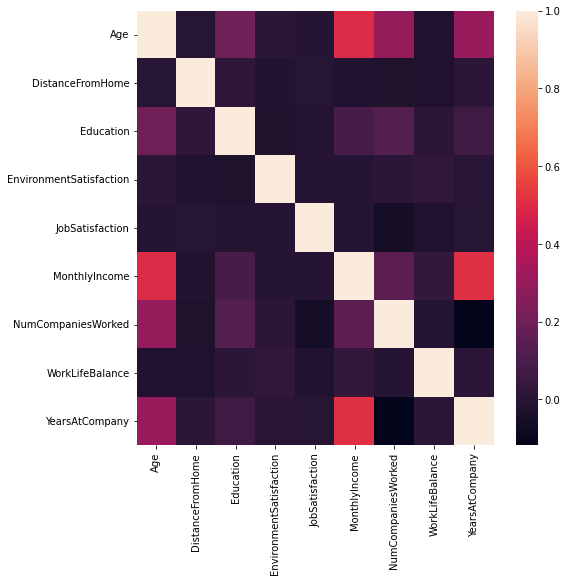

In [ ]:
  plt.figure(figsize=(8,8))
sns.heatmap(df.corr())

In [ ]:
numeric_data= df.select_dtypes(include=[np.number])
categorical_data= df.select_dtypes(exclude=[np.number])
categorical_data

,Attrition,Department,EducationField,MaritalStatus
0,Yes,Sales,Life Sciences,Single
1,No,Research & Development,Life Sciences,Married
2,Yes,Research & Development,Other,Single
3,No,Research & Development,Life Sciences,Married
4,No,Research & Development,Medical,Married
...,...,...,...,...
1465,No,Research & Development,Medical,Married
1466,No,Research & Development,Medical,Married
1467,No,Research & Development,Life Sciences,Married
1468,No,Sales,Medical,Married


In [ ]:
#Separating categorical features for one hot encoding 
cat_cols = ['Department',	'EducationField',	'MaritalStatus']

#### Countplot of each categorical feature

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64


Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64


Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64




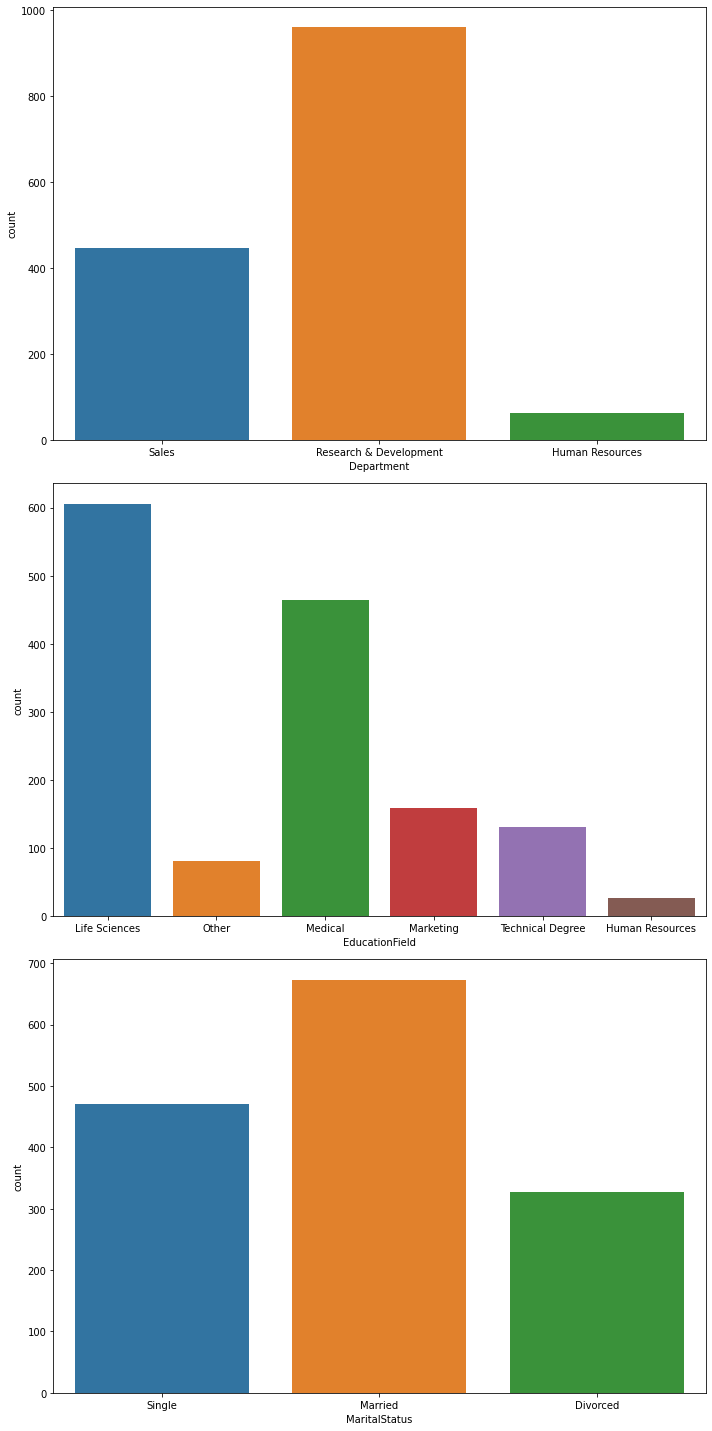

In [ ]:
fig, axes = plt.subplots(3, 1,figsize=(10, 20) )
for ax, col in zip(axes,cat_cols ):
    sns.countplot(df[col], ax=ax)
    print( df[col].value_counts())
    print("\n")
fig.tight_layout()
plt.show()

#### Countplot of each numerical feature

In [ ]:
numerical_features=['Age','DistanceFromHome',	'Education','EnvironmentSatisfaction'
	,'JobSatisfaction',	'MonthlyIncome'	,'NumCompaniesWorked',	'WorkLifeBalance',	'YearsAtCompany']

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


35    78
34    77
36    69
31    69
29    68
32    61
30    60
33    58
38    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
44    33
46    33
43    32
50    30
25    26
24    26
49    24
47    24
55    22
51    19
53    19
48    19
54    18
52    18
22    16
56    14
23    14
58    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: Age, dtype: int64


2     211
1     208
10     86
9      85
3      84
7      84
8      80
5      65
4      64
6      59
16     32
11     29
24     28
23     27
29     27
15     26
18     26
26     25
25     25
20     25
28     23
19     22
14     21
12     20
17     20
22     19
13     19
21     18
27     12
Name: DistanceFromHome, dtype: int64


3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64


3    453
4    446
2    287
1    284
Name: EnvironmentSatisfaction, dtype: int64


4    459
3    442
1    289
2    280
Name: JobSatisfaction, dtype: int64




/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

2342     4
6142     3
2741     3
2559     3
2610     3
        ..
7104     1
2773     1
19513    1
3447     1
4404     1
Name: MonthlyIncome, Length: 1349, dtype: int64


1    521
0    197
3    159
2    146
4    139
7     74
6     70
5     63
9     52
8     49
Name: NumCompaniesWorked, dtype: int64


3    893
2    344
4    153
1     80
Name: WorkLifeBalance, dtype: int64


5     196
1     171
3     128
2     127
10    120
4     110
7      90
9      82
8      80
6      76
0      44
11     32
20     27
13     24
15     20
14     18
22     15
12     14
21     14
18     13
16     12
19     11
17      9
24      6
33      5
25      4
26      4
31      3
32      3
27      2
36      2
29      2
23      2
37      1
40      1
34      1
30      1
Name: YearsAtCompany, dtype: int64




/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


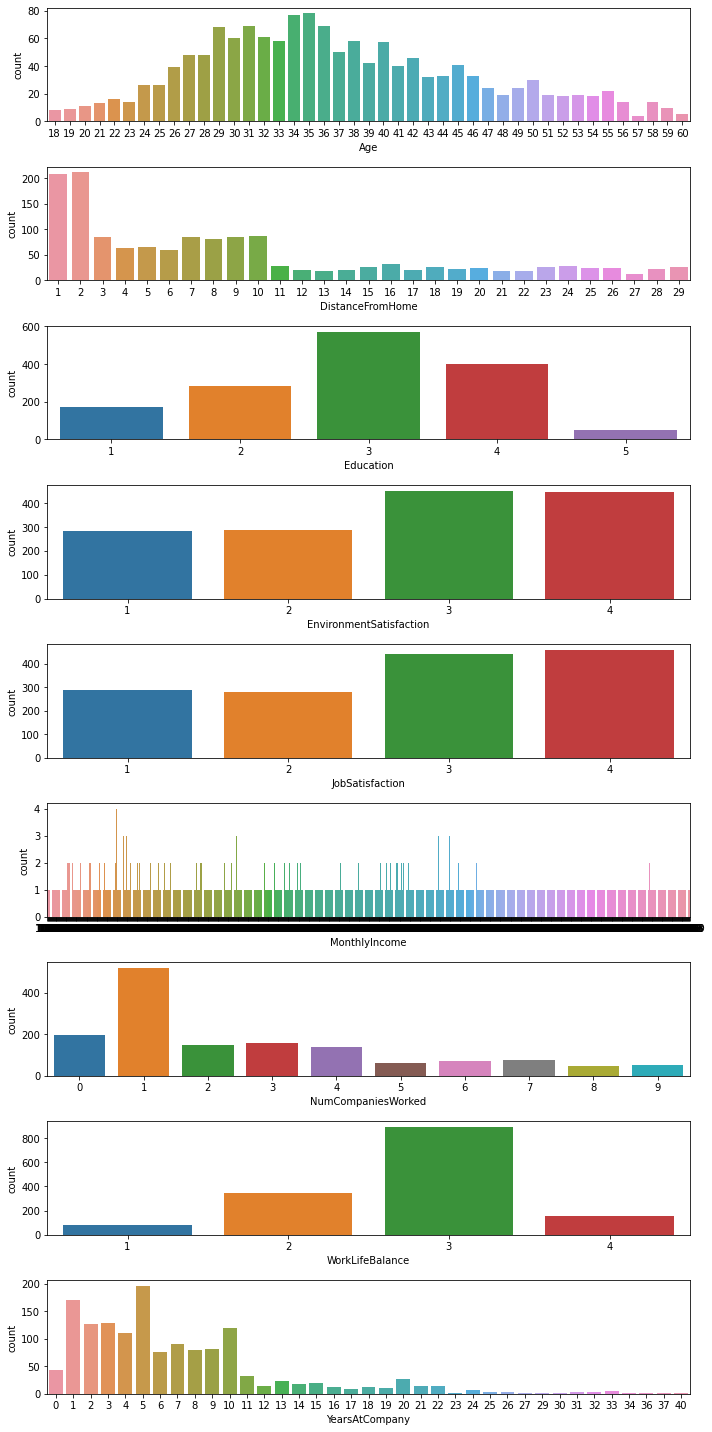

In [ ]:
fig, axes = plt.subplots(9, 1,figsize=(10, 20) )
for ax, col in zip(axes,numerical_features ):
    sns.countplot(df[col], ax=ax)
    print( df[col].value_counts())
    print("\n")
fig.tight_layout()
plt.show()

#### Count of each categorical feature based on the attibution feature

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64


Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64


Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64




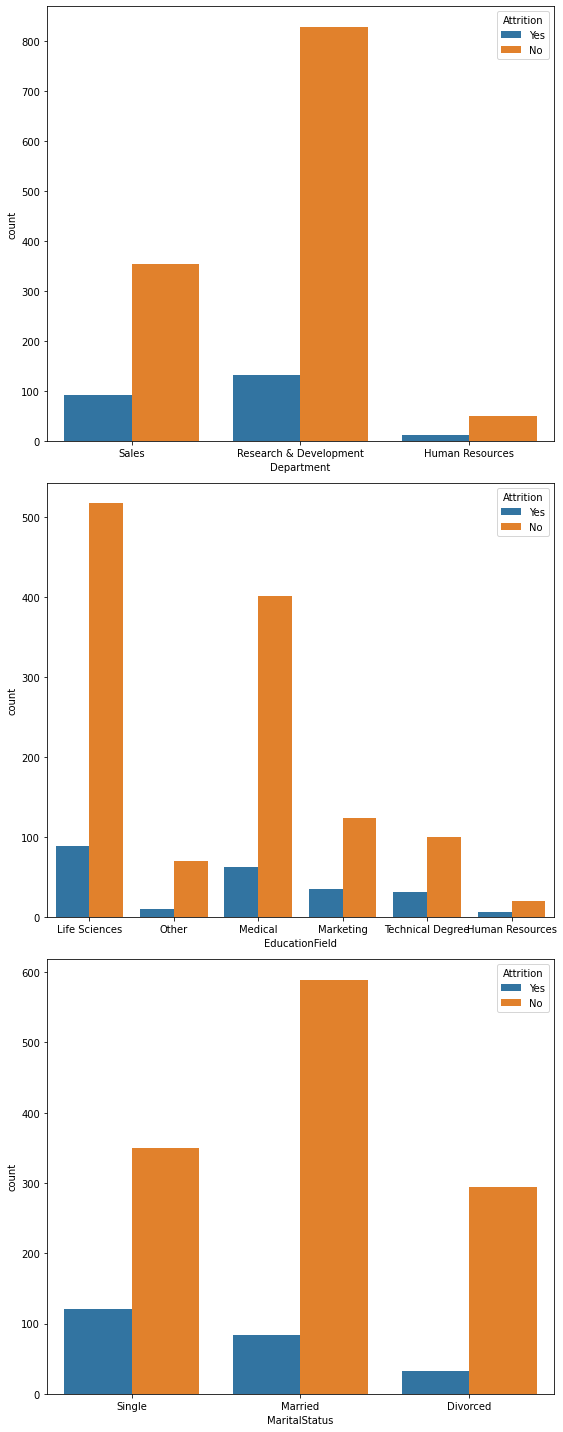

In [ ]:
fig, axes = plt.subplots(3, 1,figsize=(8, 20) )
for ax, col in zip(axes,cat_cols ):
    sns.countplot(x=col,hue='Attrition',data=df,ax=ax)
    print( df[col].value_counts())
    print("\n")
fig.tight_layout()
plt.show()

#### countplot of each numerical feature based on attribution feature

35    78
34    77
36    69
31    69
29    68
32    61
30    60
33    58
38    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
44    33
46    33
43    32
50    30
25    26
24    26
49    24
47    24
55    22
51    19
53    19
48    19
54    18
52    18
22    16
56    14
23    14
58    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: Age, dtype: int64


2     211
1     208
10     86
9      85
3      84
7      84
8      80
5      65
4      64
6      59
16     32
11     29
24     28
23     27
29     27
15     26
18     26
26     25
25     25
20     25
28     23
19     22
14     21
12     20
17     20
22     19
13     19
21     18
27     12
Name: DistanceFromHome, dtype: int64


3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64


3    453
4    446
2    287
1    284
Name: EnvironmentSatisfaction, dtype: int64


4    459
3    442
1    289
2    280
Name: JobSatisfaction, dtype: int64


2342     4
6142     3
274

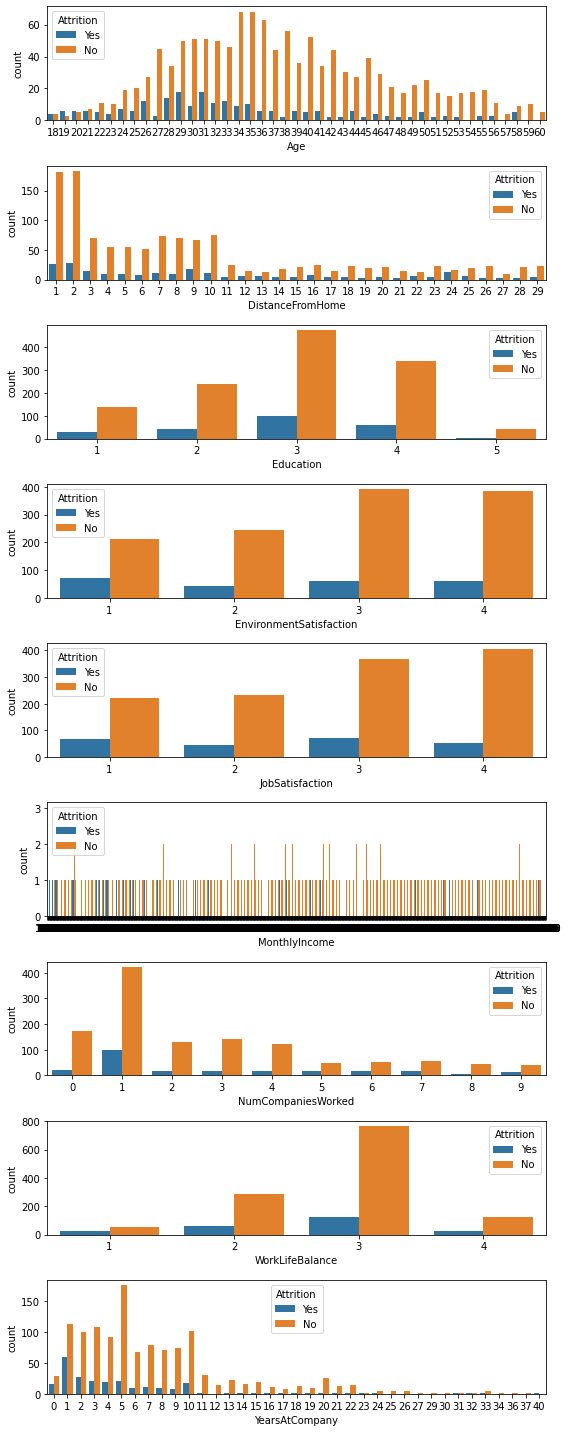

In [ ]:
fig, axes = plt.subplots(9, 1,figsize=(8, 20) )
for ax, col in zip(axes,numerical_features ):
    sns.countplot(x=col,hue='Attrition',data=df,ax=ax)
    print( df[col].value_counts())
    print("\n")
fig.tight_layout()
plt.show()

#### Employees lost to attrition based on Department

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

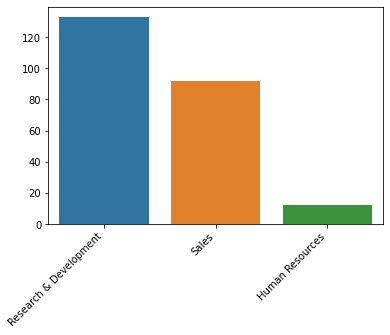

In [ ]:
department=df['Department'][df['Attrition']=='Yes'].value_counts()
sns.barplot(x=department.index,y=department.values)
plt.xticks(rotation=45,horizontalalignment='right')

#### Employees lost to attrition based on Education Field

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

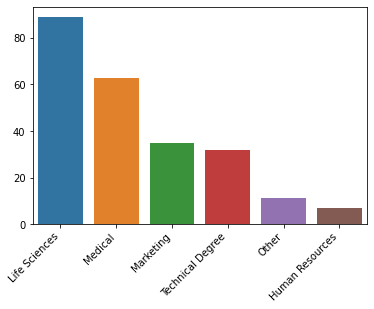

In [ ]:
education_field=df['EducationField'][df['Attrition']=='Yes'].value_counts()
sns.barplot(x=education_field.index,y=education_field.values)
plt.xticks(rotation=45,horizontalalignment='right')

In [ ]:
#Creating a list with the names of continous features
num_cols = []
for col in df.columns:
    if col not in cat_cols:
        num_cols.append(col)

#Removing Attribution as it is a label
num_cols.remove('Attrition')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


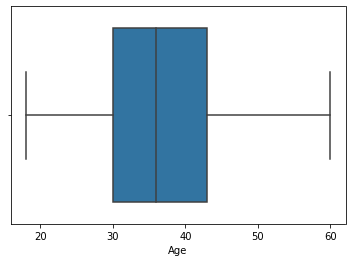

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


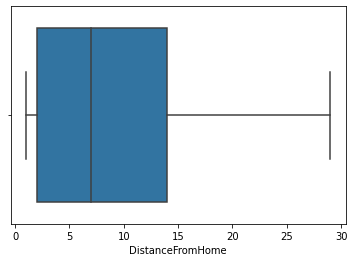

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


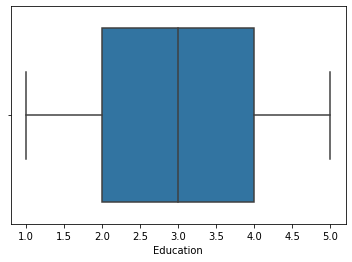

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


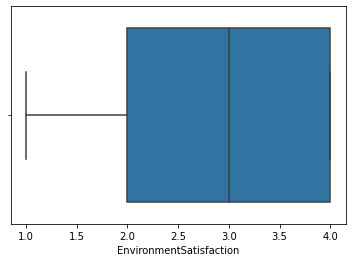

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


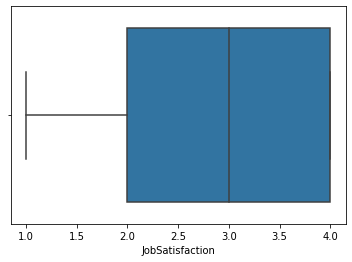

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


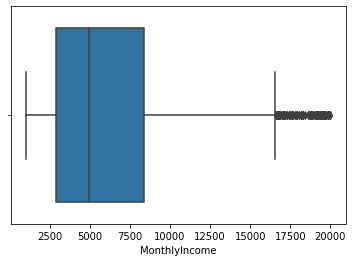

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


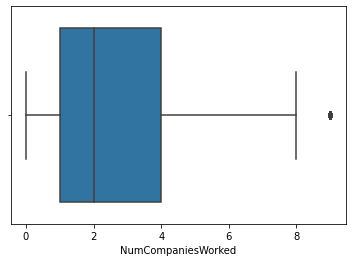

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


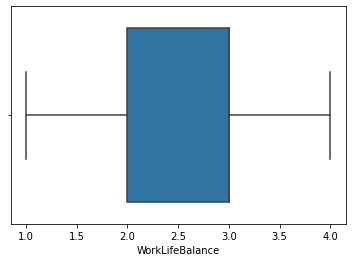

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


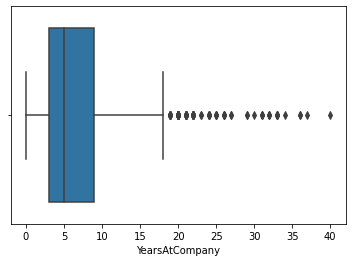

In [ ]:
#Plotting box plots for checking outliers
for col in num_cols:
    sns.boxplot(df[col])
    plt.show()

In [ ]:
def change_to_num(val):
    if val=='Yes':
        return 1
    else :
        return 0

In [ ]:
#Converting the label from string to numerical
df['Attrition'] = df['Attrition'].apply(change_to_num)

In [ ]:
#One hot encoding all the categorical features using pandas .get_dummies
for col in cat_cols:
    df[col] = df[col].astype(str)
    df = pd.concat([df,pd.get_dummies(df[col], prefix=col)],axis=1)

In [ ]:
#Removing the original catrgorical column
for col in cat_cols:
    df.drop(col,axis=1,inplace=True)

In [ ]:
print(df.columns.values)

['Age' 'Attrition' 'DistanceFromHome' 'Education'
 'EnvironmentSatisfaction' 'JobSatisfaction' 'MonthlyIncome'
 'NumCompaniesWorked' 'WorkLifeBalance' 'YearsAtCompany'
 'Department_Human Resources' 'Department_Research & Development'
 'Department_Sales' 'EducationField_Human Resources'
 'EducationField_Life Sciences' 'EducationField_Marketing'
 'EducationField_Medical' 'EducationField_Other'
 'EducationField_Technical Degree' 'MaritalStatus_Divorced'
 'MaritalStatus_Married' 'MaritalStatus_Single']


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


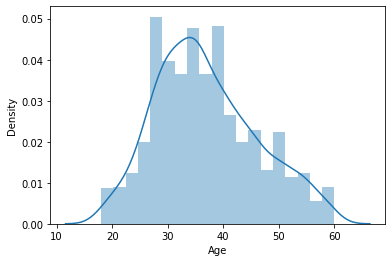

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


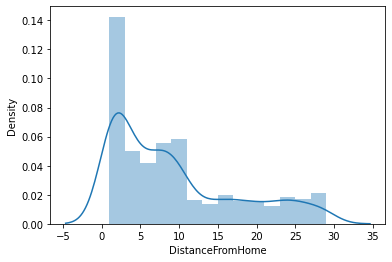

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


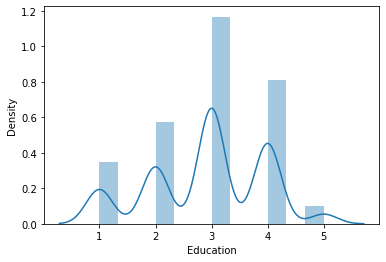

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


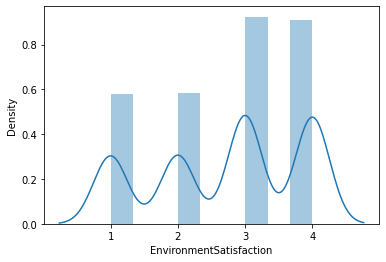

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


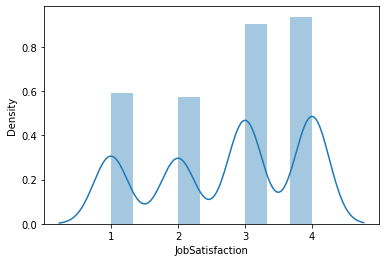

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


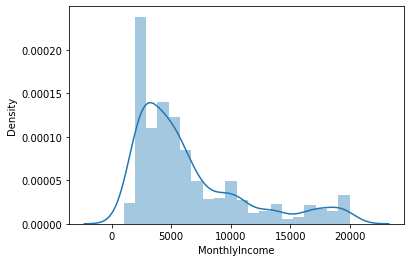

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


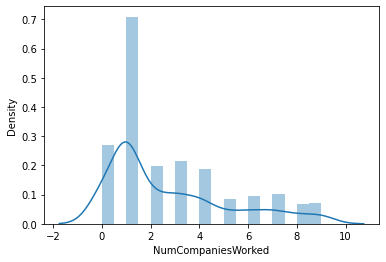

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


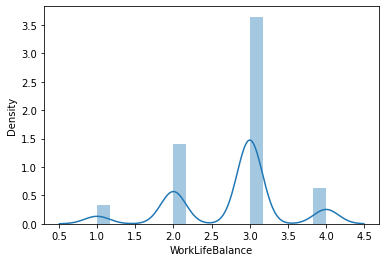

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


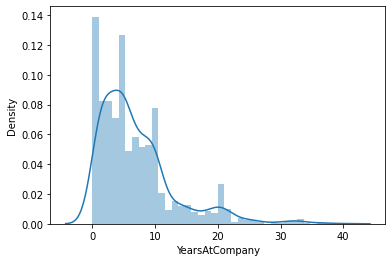

In [ ]:
#Plotting the distibution of each continous feature
for col in num_cols:
    
    sns.distplot(df[col])
    plt.show()

In [ ]:
#Using smote to balance the dataset
from imblearn.over_sampling import SMOTE
X = df.drop('Attrition',axis=1)
y = df['Attrition']
oversample = SMOTE()
X_over, y_over = oversample.fit_resample(X, y)

In [ ]:
print("Number of samples before SMOTE {}:".format(X.shape[0]))
print("Number of samples before SMOTE {}:".format(X_over.shape[0]))

Number of samples before SMOTE 1470:
Number of samples before SMOTE 2466:


In [ ]:
#creating a new dataframe which has oversampled data
df_over = pd.concat([X_over,y_over],axis=1)
df_over.shape

(2466, 22)

In [ ]:
#Min max scale the numerical columns
from sklearn import preprocessing
mm_scaler = preprocessing.MinMaxScaler()

x_temp = df_over[num_cols].values
x_scaled = mm_scaler.fit_transform(x_temp)
df_temp = pd.DataFrame(x_scaled, columns=num_cols, index = df_over.index)
df_over[num_cols] = df_temp

In [ ]:
df_over.describe()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany,Department_Human Resources,...,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Attrition
count,2466.000000,2466.000000,2466.000000,2466.000000,2466.000000,2466.000000,2466.000000,2466.000000,2466.000000,2466.000000,...,2466.000000,2466.000000,2466.000000,2466.000000,2466.000000,2466.000000,2466.000000,2466.000000,2466.000000,2466.000000
mean,0.410623,0.308191,0.436436,0.480400,0.489457,0.249639,0.287420,0.532576,0.151916,0.027575,...,0.010949,0.302920,0.074209,0.212084,0.036496,0.058394,0.141119,0.317113,0.293998,0.500000
std,0.213420,0.271580,0.245630,0.359423,0.359176,0.226714,0.262631,0.242902,0.146498,0.163785,...,0.104084,0.459614,0.262164,0.408867,0.187560,0.234535,0.348215,0.465446,0.455684,0.500101
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.261905,0.071429,0.250000,0.000000,0.333333,0.085532,0.111111,0.333333,0.050000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.380952,0.250000,0.500000,0.500000,0.666667,0.172775,0.222222,0.666667,0.125000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000
75%,0.547619,0.491071,0.500000,0.666667,0.666667,0.334571,0.444444,0.666667,0.200000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#Splitting the data into testing and training
from sklearn.model_selection import train_test_split
X = df_over.drop('Attrition',axis=1)
Y = df_over['Attrition']
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y,test_size = 0.2,random_state =2)

In [ ]:
# Initialzing empty lists to append all model's name and corresponding name
acc = []
model = []

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

DecisionTrees's Accuracy is:  84.21052631578947


In [ ]:
print("Metric Evaluation for Decision Tree ")
print("Avg Precision: "+ str(round(precision_score(Ytest, predicted_values, average="macro"),4))) 
print("Avg Recall: " + str(round(recall_score(Ytest, predicted_values, average="macro"),4)))
print("Avg F1 score: " + str(round(f1_score(Ytest, predicted_values, average="macro"),4)))

Metric Evaluation for Decision Tree 
Avg Precision: 0.8453
Avg Recall: 0.8443
Avg F1 score: 0.8421


#KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#Finding the optimal k value 
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(Xtrain,Ytrain)
    pred_i = knn.predict(Xtest)
    error_rate.append(np.mean(pred_i != Ytest))

Text(0, 0.5, 'Error Rate')

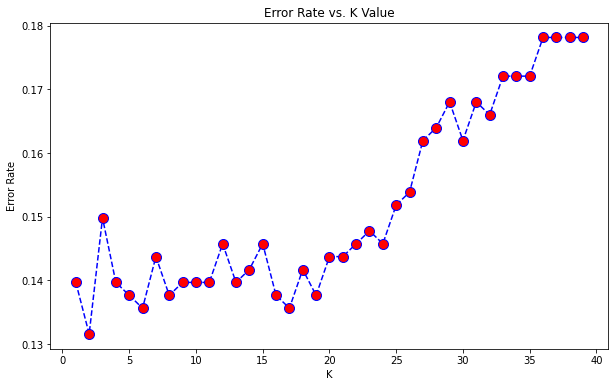

In [ ]:
#Plotting the error rate for different k values
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
#lowest error rate with corresponding k value
print("The lowest error rate is {} for n_neighbours = {}".format(min(error_rate),error_rate.index(min(error_rate))+1))

The lowest error rate is 0.13157894736842105 for n_neighbours = 2


In [ ]:
#KNN with 2 neighbours
knn2 = KNeighborsClassifier(n_neighbors=error_rate.index(min(error_rate))+1)
knn.fit(Xtrain,Ytrain)
predicted_values = knn.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('KNN(k=2)')
print("KNN(k=2) accuracy is: ", x*100)

KNN(k=2) accuracy is:  82.18623481781377


In [ ]:
print("Metric Evaluation for KNN ")
print("Avg Precision: "+ str(round(precision_score(Ytest, predicted_values, average="macro"),4))) 
print("Avg Recall: " + str(round(recall_score(Ytest, predicted_values, average="macro"),4)))
print("Avg F1 score: " + str(round(f1_score(Ytest, predicted_values, average="macro"),4)))

Metric Evaluation for KNN 
Avg Precision: 0.8249
Avg Recall: 0.824
Avg F1 score: 0.8218


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  0.8947368421052632
              precision    recall  f1-score   support

           0       0.84      0.96      0.90       236
           1       0.96      0.83      0.89       258

    accuracy                           0.89       494
   macro avg       0.90      0.90      0.89       494
weighted avg       0.90      0.89      0.89       494



In [ ]:
print("Metric Evaluation for Random Forest ")
print("Avg Precision: "+ str(round(precision_score(Ytest, predicted_values, average="macro"),4))) 
print("Avg Recall: " + str(round(recall_score(Ytest, predicted_values, average="macro"),4)))
print("Avg F1 score: " + str(round(f1_score(Ytest, predicted_values, average="macro"),4)))

Metric Evaluation for Random Forest 
Avg Precision: 0.9003
Avg Recall: 0.8976
Avg F1 score: 0.8947


# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Logistic Regression's Accuracy is:  0.8582995951417004
              precision    recall  f1-score   support

           0       0.79      0.95      0.86       236
           1       0.94      0.78      0.85       258

    accuracy                           0.86       494
   macro avg       0.87      0.86      0.86       494
weighted avg       0.87      0.86      0.86       494



In [ ]:
print("Metric Evaluation for Logistic Regression ")
print("Avg Precision: "+ str(round(precision_score(Ytest, predicted_values, average="macro"),4))) 
print("Avg Recall: " + str(round(recall_score(Ytest, predicted_values, average="macro"),4)))
print("Avg F1 score: " + str(round(f1_score(Ytest, predicted_values, average="macro"),4)))

Metric Evaluation for Logistic Regression 
Avg Precision: 0.8689
Avg Recall: 0.8622
Avg F1 score: 0.858


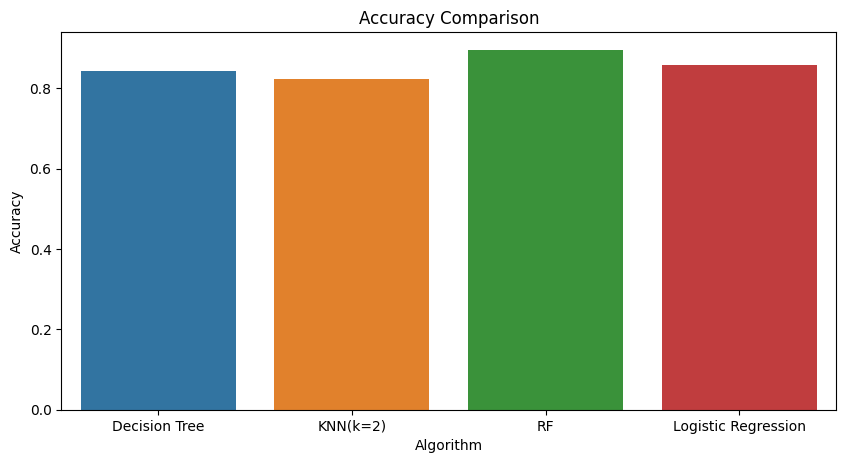

In [ ]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
p = sns.barplot(x = model,y = acc, ci=None)